In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

In [80]:
df = pd.read_csv('1000_Companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [81]:
# split the data into features and labels
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X


array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [82]:
#visualize the correlation between features
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<AxesSubplot:>

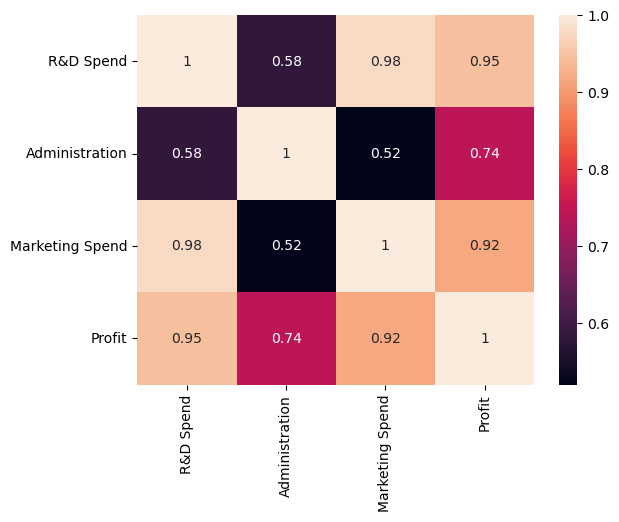

In [83]:
sns.heatmap(corr,annot =True)

### LabelEncoder converts each class under specified feature to a numerical value.
### But if the categorical feature is multi class, LabelEncoder will return different values for different classes
### In this case, using LabelEncoder only is not a good choice, since it brings in a natural ordering for different classes.
### We need to specify categorical feature using its mask inside OneHotEncoder. The sparse=False argument outputs a non-sparse matrix.
### ColumnTransformer :This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.
### transformerslist of tuples

    List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.

In [84]:
# encoding categorical data
# LabelEncoder converts each class under specified feature to a numerical value.
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
label_encoder = LabelEncoder()
X[:,3] = label_encoder.fit_transform(X[:,3])

ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)
#avoiding the dummy variable trap
X = X[:, 1:]
X





array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [86]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [87]:
#fitting linear regression model to our data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [88]:
#predict the result
y_pred = model.predict(X_test)
y_pred

array([ 89790.61532915,  88427.0718736 ,  94894.67836971, 175680.86725612,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.82667399,  66950.19050988, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053063,  75316.2814305 ,
       118248.14406603, 164574.40699903, 170937.2898107 , 182069.11645086,
       118845.03252688,  85669.95112228, 180992.59396145,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.07669089,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529206, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.48986819, 158416.46827611,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924518, 174609.08266881,
        93745.66352058,  

In [91]:
#view the coefficients or weights
model.coef_

array([-8.80536598e+02, -6.98169073e+02,  5.25845857e-01,  8.44390881e-01,
        1.07574255e-01])

In [92]:
# view the intercept or the bias
model.intercept_

-51035.22972404407

In [99]:
#evaluting the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.911269589226883